## **IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import random 
import cv2
import os
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import callbacks
import matplotlib.pyplot as plt


In [2]:
#Importing data set from Kaggle
os.environ['KAGGLE_USERNAME'] = 'yusufmoola211'
os.environ['KAGGLE_KEY'] = '00c7ae4c784f63a68821345cd24f9474'
! kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset


 95% 313M/330M [00:03<00:00, 95.4MB/s]
100% 330M/330M [00:03<00:00, 88.3MB/s]


In [3]:
#Unzipping file
! unzip face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [2]:
#Directories for the three files: Test, Train and Validation
root_dir = '/content/Face Mask Dataset'
train_directory = os.path.join(root_dir, 'Train') 
val_directory = os.path.join(root_dir, 'Validation')
test_directory = os.path.join(root_dir, 'Test')

#Getting Mask and no mask folder within the train directory
train_with_mask = os.path.join(train_directory, 'WithMask')
train_without_mask = os.path.join(train_directory, 'WithoutMask')

#Getting Mask and no mask folder within the valid directory
val_with_mask = os.path.join(val_directory, 'WithMask')
val_without_mask = os.path.join(val_directory, 'WithoutMask')

#Getting Mask and no mask folder within the test directory

test_with_mask = os.path.join(test_directory, 'WithMask')
test_without_mask = os.path.join(test_directory, 'WithoutMask')


In [3]:
# Number of images in the training dataset
print("-------------------------------")
print('Training dataset image count:')
print("-------------------------------")
print("Number of Mask labeled images -", len(os.listdir(train_with_mask)))
print("Number of NonMask labeled images -", len(os.listdir(train_without_mask)))

# Number of images in the valid dataset
print("\n-------------------------------")
print('Valid dataset image count:')
print("-------------------------------")
print("Number of Mask labeled images -", len(os.listdir(val_with_mask)))
print("Number of NonMask labeled images -", len(os.listdir(val_without_mask)))

# Number of images in the test dataset
print("\n-------------------------------")
print('Test dataset image count:')
print("-------------------------------")
print("Number of Mask labeled images -", len(os.listdir(test_with_mask)))
print("Number of NonMask labeled images -", len(os.listdir(test_without_mask)))




-------------------------------
Training dataset image count:
-------------------------------
Number of Mask labeled images - 5000
Number of NonMask labeled images - 5000

-------------------------------
Valid dataset image count:
-------------------------------
Number of Mask labeled images - 400
Number of NonMask labeled images - 400

-------------------------------
Test dataset image count:
-------------------------------
Number of Mask labeled images - 483
Number of NonMask labeled images - 509


In [4]:
#Training set with and without mask count
num_withmask_tr = len(os.listdir(train_with_mask))
num_withoutmask_tr = len(os.listdir(train_without_mask))

#Valid set with and without mask count
num_withmask_val = len(os.listdir(os.path.join(val_directory, 'WithMask')))
num_withoutmask_val = len(os.listdir(os.path.join(val_directory, 'WithoutMask')))

#Test set with and without mask count
num_withmask_test = len(os.listdir(os.path.join(test_directory, 'WithMask')))
num_withoutmask_test = len(os.listdir(os.path.join(test_directory, 'WithoutMask')))

#Totals
total_train = num_withmask_tr + num_withoutmask_tr
total_val = num_withmask_val + num_withoutmask_val
total_test = num_withmask_test + num_withoutmask_test


print("----------------------------------------")
print("                 TOTALS                 ")
print("----------------------------------------")
print("Number of images from Training set:", total_train)
print("Number of images from Validation set:", total_val)
print("Number of images from Test set:", total_test)



----------------------------------------
                 TOTALS                 
----------------------------------------
Number of images from Training set: 10000
Number of images from Validation set: 800
Number of images from Test set: 992


# **DATA** **VISUALIZATION**

In [5]:
#Main directory that includes Test, Train and Validation dataset
path = root_dir
#Lists the folders in the root directory
os.listdir(path)


['Validation', 'Test', 'Train']

In [6]:
image_links = []
mask_or_not = []
category = []

#loop through folders in root directory
for folder in os.listdir(path):
    #Loop through labels (WithMask and WithoutMask) in each folder of Test, Train and Validation
    for label in os.listdir(path + "/" + folder):
        #Gets images in each folder
        for image in glob.glob(path+ "/" + folder + "/" + label + "/" + "*.png"):
            image_links.append(image)
            mask_or_not.append(label)
            category.append(folder)


#Making the pandas dataframe            
data = pd.DataFrame({'image_links':image_links,'label':mask_or_not,'category':category})
#Outputting the first 4 columns of the dataframe as a sample view
data.head()

,image_links,label,category
0,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
1,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
2,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
3,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
4,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation


In [7]:
#Seperarting the data frame into train, test and val through filter operations
train_data =data[data['category']=='Train'].sample(frac=1)
test_data = data[data['category']=='Test'].sample(frac=1)
validation = data[data['category']=='Validation'].sample(frac=1) 

#btw frac=1 just means getting 100% of the row data to return

#Variables for the image paths of each set (Train, test and valid)
train_path = train_data.image_links
test_path = test_data.image_links
valid_path = validation.image_links

In [8]:
#Function to plot the images
def plot_images(data):
    for index in range(10):

        #Getting image from dataframe, opencv used to read image from path
        plt.imshow(cv2.imread(data.iloc[index,0]))

        #Adding title to the image for the label and which category it belongs to
        plt.title('{}:{}'.format(data.iloc[index,1],data.iloc[index,2]))
        plt.show()

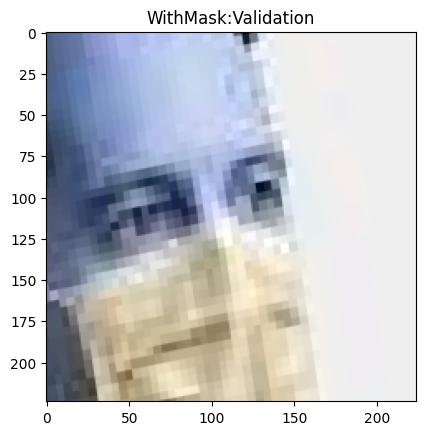

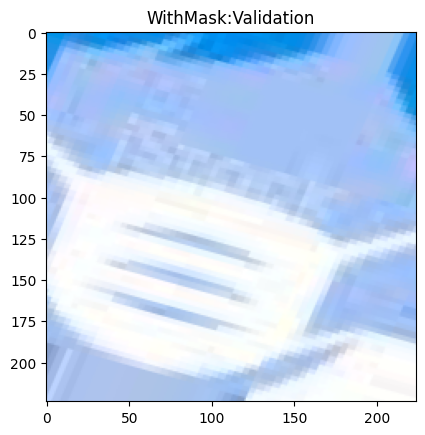

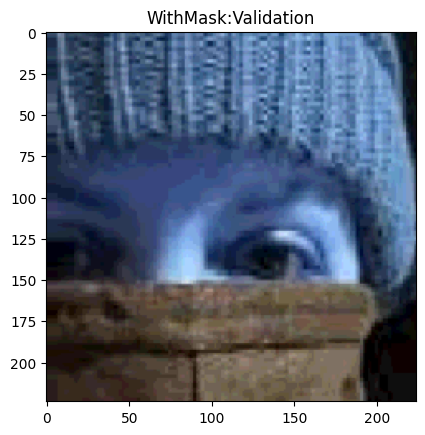

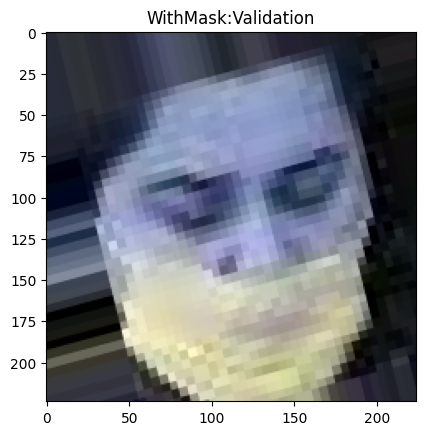

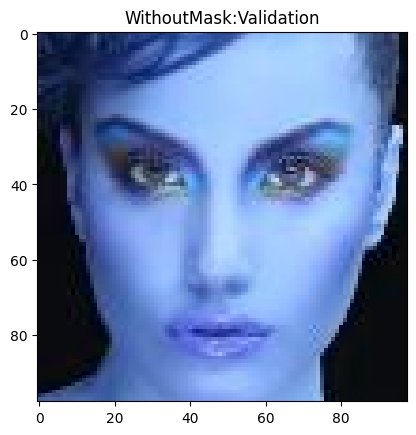

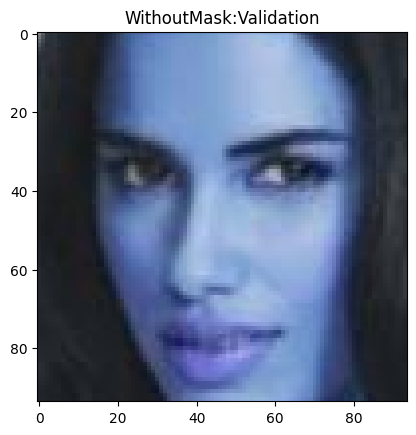

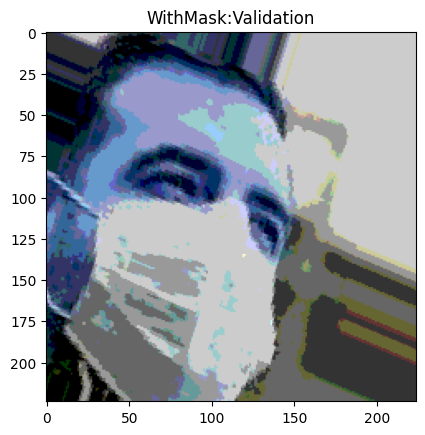

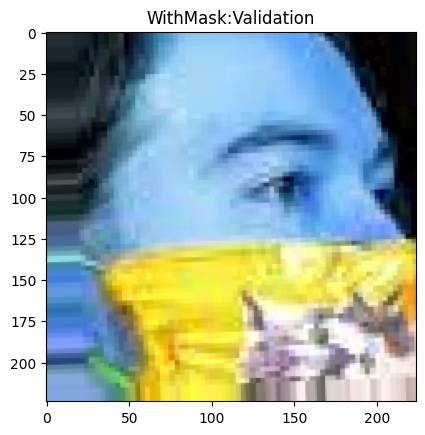

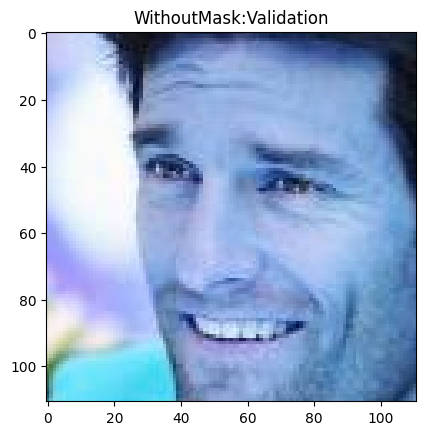

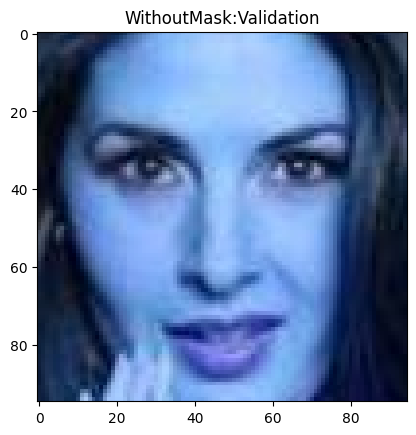

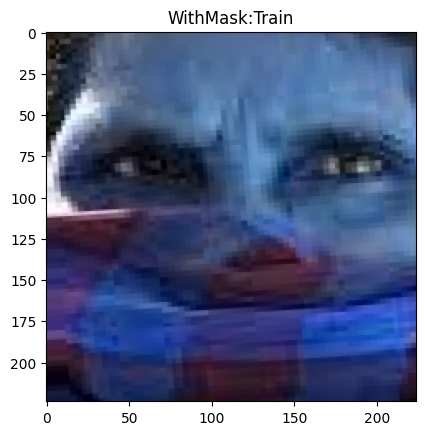

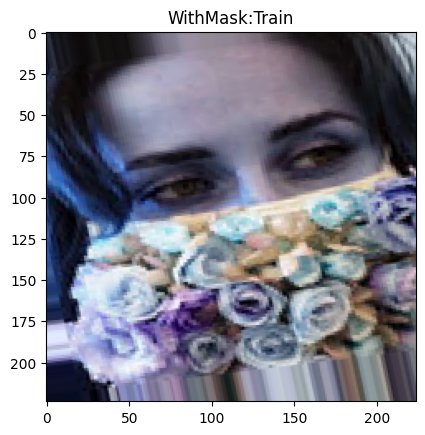

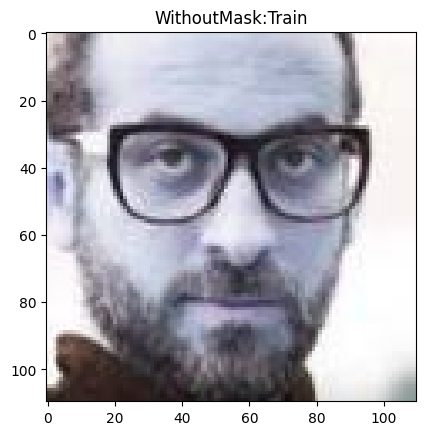

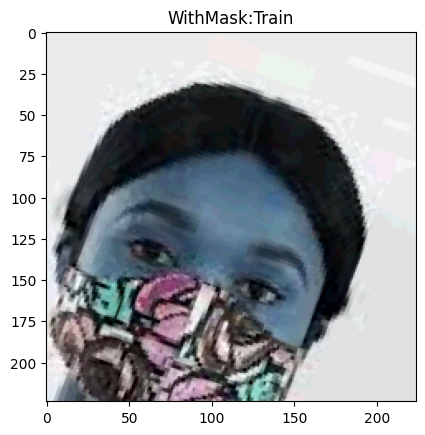

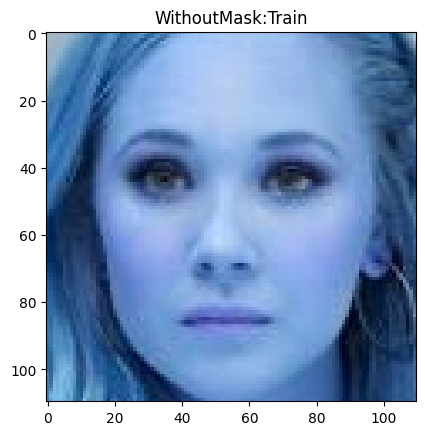

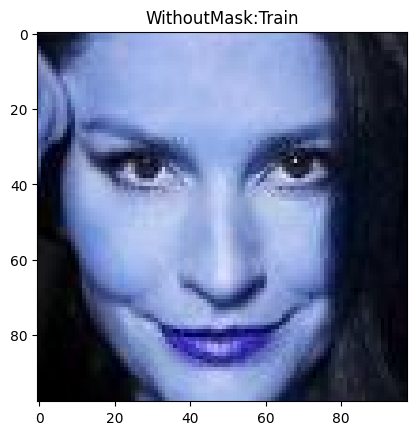

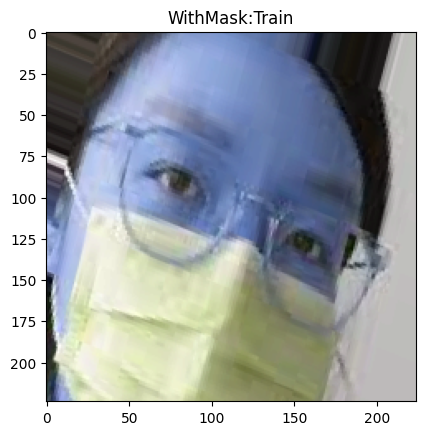

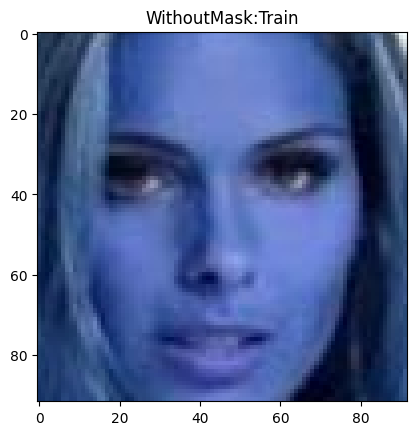

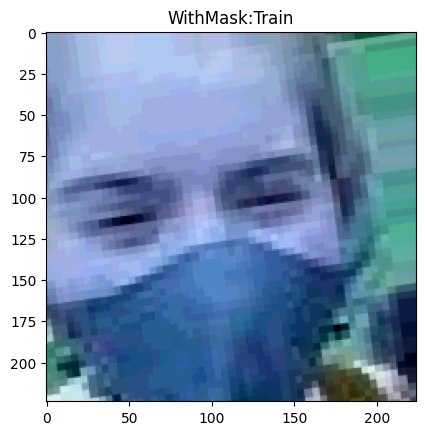

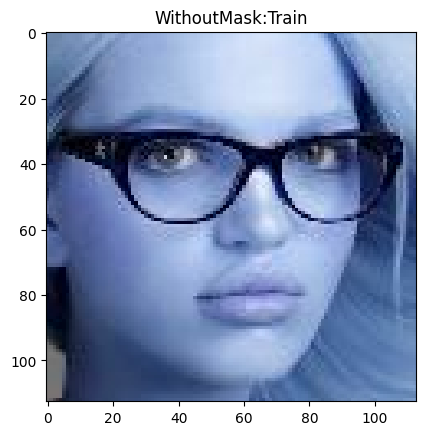

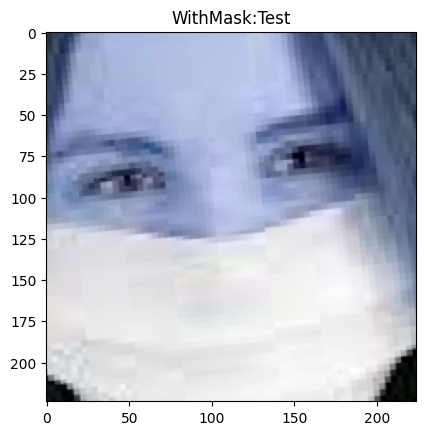

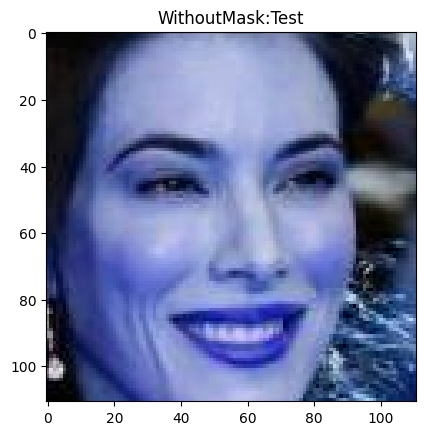

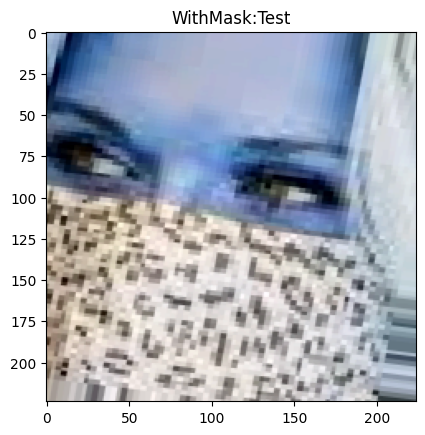

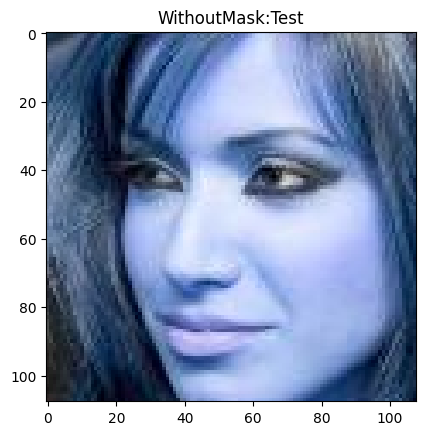

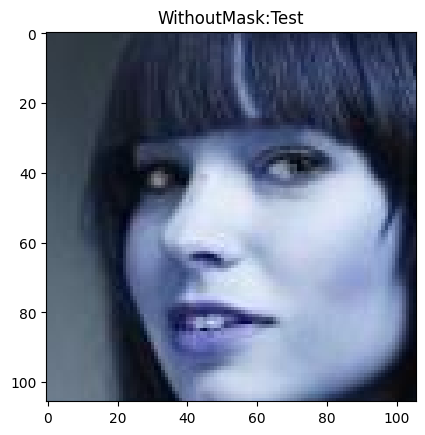

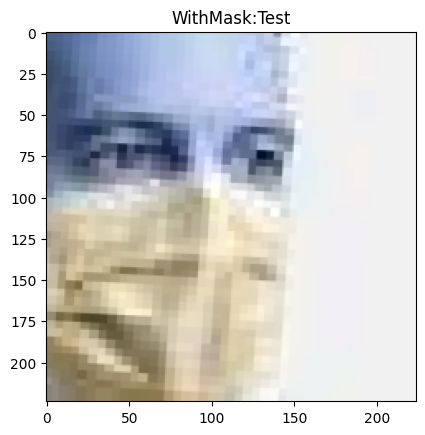

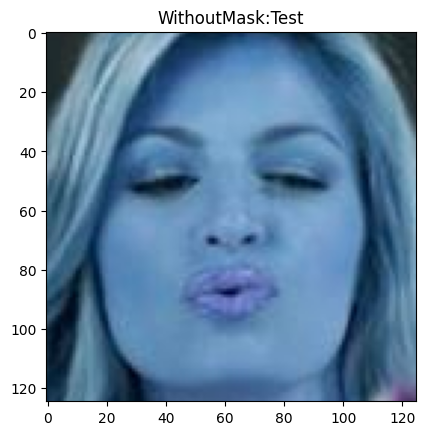

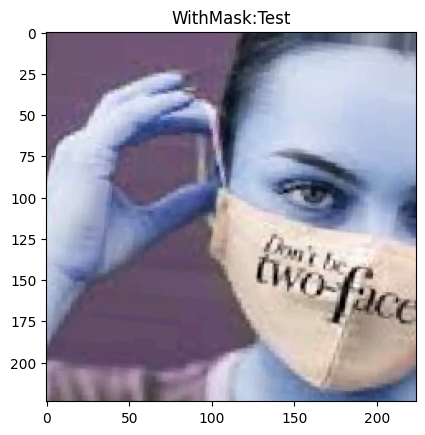

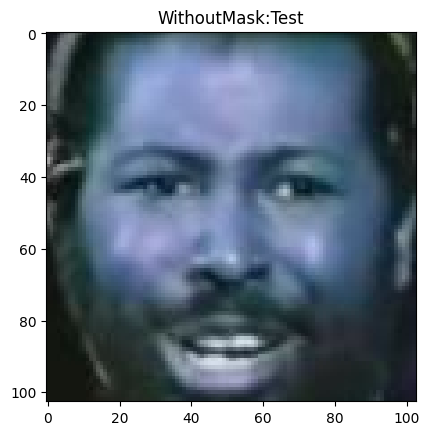

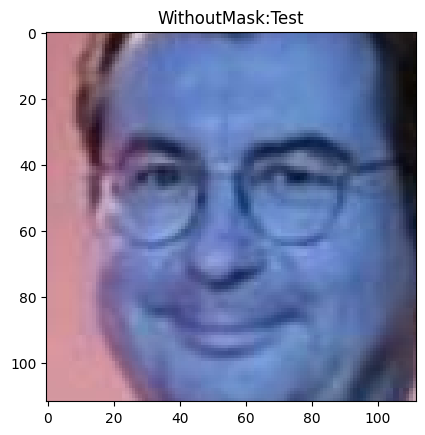

In [9]:
plot_images(validation)
plot_images(train_data)
plot_images(test_data)

# **LABELS AND PREPROCESSING**

In [10]:
# Define the classes
classes = ['WithMask', 'WithoutMask']
BATCH_SIZE = 32
"""
# Define a function to load and preprocess the images
def load_image(path):
    # Load the image and resize it
    img = cv2.imread(path)
    img = cv2.resize(img, (224,224))
    
    # Preprocess the image
    img = img / 255.0
    img = np.array(img)
    
    return img
"""

'\n# Define a function to load and preprocess the images\ndef load_image(path):\n    # Load the image and resize it\n    img = cv2.imread(path)\n    img = cv2.resize(img, (224,224))\n    \n    # Preprocess the image\n    img = img / 255.0\n    img = np.array(img)\n    \n    return img\n'

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                       batch_size=BATCH_SIZE,
                                                       image_size=(224,224),
                                                       shuffle=True)
validation_ds = tf.keras.utils.image_dataset_from_directory(val_directory,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(224,224),
                                                            shuffle=True)
test_ds = tf.keras.utils.image_dataset_from_directory(test_directory,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=(224,224),
                                                      shuffle=False)


Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


In [ ]:
# Load the training images in batches
"""
train_images = []
train_labels = []

def load_train():
  for c in classes:
      class_path = os.path.join(train_directory, c)
      class_list = os.listdir(class_path)
      for image_path in class_list:
          img = load_image(os.path.join(class_path, image_path))
          train_images.append(img)
          train_labels.append(classes.index(c))

  # Convert the lists to numpy arrays
  train_images = np.array(train_images)
  train_labels = np.array(train_labels)

# Load the validation images
val_images = []
val_labels = []

for c in classes:
    class_path = os.path.join(val_directory, c)
    for image_path in os.listdir(class_path):
        img = load_image(os.path.join(class_path, image_path))
        val_images.append(img)
        val_labels.append(classes.index(c))

# Convert the lists to numpy arrays
val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Load the test images
test_images = []
test_labels = []
for c in classes:
    class_path = os.path.join(test_directory, c)
    for image_path in os.listdir(class_path):
        img = load_image(os.path.join(class_path, image_path))
        test_images.append(img)
        test_labels.append(classes.index(c))

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Convert the labels to categorical format
train_labels = tf.keras.utils.to_categorical(train_labels, len(classes))
val_labels = tf.keras.utils.to_categorical(val_labels, len(classes))
test_labels = tf.keras.utils.to_categorical(test_labels, len(classes))
"""

'\ntrain_images = []\ntrain_labels = []\n\ndef load_train():\n  for c in classes:\n      class_path = os.path.join(train_directory, c)\n      class_list = os.listdir(class_path)\n      for image_path in class_list:\n          img = load_image(os.path.join(class_path, image_path))\n          train_images.append(img)\n          train_labels.append(classes.index(c))\n\n  # Convert the lists to numpy arrays\n  train_images = np.array(train_images)\n  train_labels = np.array(train_labels)\n\n# Load the validation images\nval_images = []\nval_labels = []\n\nfor c in classes:\n    class_path = os.path.join(val_directory, c)\n    for image_path in os.listdir(class_path):\n        img = load_image(os.path.join(class_path, image_path))\n        val_images.append(img)\n        val_labels.append(classes.index(c))\n\n# Convert the lists to numpy arrays\nval_images = np.array(val_images)\nval_labels = np.array(val_labels)\n\n# Load the test images\ntest_images = []\ntest_labels = []\nfor c in classe

In [12]:
# autotune buffer to avoid I/0 block
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
num_classes = 2
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #128x128
  tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #64x64
  tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #32x32
  tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #16x16
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [15]:
# defining callback function to avoid overfit
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 6, 
                                        restore_best_weights = True, verbose=1)

In [16]:
model.fit(
  train_ds,
  validation_data=validation_ds,
  batch_size=BATCH_SIZE,
  epochs=1,
  callbacks =[earlystopping]
)

313/313 [==============================] - 226s 713ms/step - loss: 0.1679 - accuracy: 0.9402 - val_loss: 0.0496 - val_accuracy: 0.9850


In [17]:
e = model.evaluate(test_ds)

print(f'Test set accuracy: {"{0:.2f}".format(e[1]*100)}%')

31/31 [==============================] - 4s 113ms/step - loss: 0.0804 - accuracy: 0.9788
Test set accuracy: 97.88%


# **Face Detection from image**

In [ ]:
# import cv2
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

In [ ]:
base_dir = '/content/drive/My Drive/UofT AI project google collab/'

In [ ]:


# Read the input image
img = cv2.imread(base_dir + 'img/people.jpg')
  
# convert to grayscale of each frames
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# read the haarcascade to detect the faces in an image
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# detects faces in the input image
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
print('Number of detected faces:', len(faces))

# loop over all detected faces
if len(faces) > 0:
   for i, (x,y,w,h) in enumerate(faces):
      
      # To draw a rectangle in a face
      cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
      face = img[y:y+h, x:x+w]
      cv2_imshow(face)
      cv2.imwrite(f'face{i}.jpg', face)
      print(f"face{i}.jpg is saved")

# display the image with detected faces
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()